In [0]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import io                                # 입력(input)과 출력(output) 관련 라이브러리입니다.
import numpy as np                       # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                      # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt          # 시각화 설정 클래스입니다.

from google.colab import files           # 구글 콜랩용 라이브러리에서 파일을 다루는 클래스입니다.

from sklearn.cluster import KMeans       # 사용할 머신러닝 알고리즘입니다.

In [0]:
# 로컬PC에서 데이터를 현재 구글 콜랩 페이지에 업로드합니다.
uploaded = files.upload()

Saving blob.csv to blob (1).csv


In [0]:
# 업로드한 파일 이름을 명시합니다.
## 주의: 업로드한 파일명을 확인해주세요.
filename = 'blob.csv'

# CSV 파일을 데이터프레임 형태로 가져옵니다.
## 주의: 파일 확장자를 확인해주세요.
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=',', encoding='utf-8')

In [0]:
# 해당 데이터셋에 종속변수는 없습니다.
x = df.values

In [0]:
# 랜덤함수의 값을 고정합니다.
## 랜덤값을 고정하여 같은 상황에서 같은 결과를 얻기 위한 것입니다. (재현성 참조)
seed = 42

In [0]:
# 생성할 클러스터 개수를 결정합니다.
n_clusters = 3

# 사용할 알고리즘을 불러옵니다.
## 주의: k-means clustering 모델의 총 iteration은 n_init * max_iter입니다.
model = KMeans(
    n_clusters=n_clusters,    # 나눌 클러스터의 개수를 결정합니다.
    n_init=10,                # 새로운 클러스터의 중심(centroid)을 생성할 횟수를 결정합니다.
    max_iter=300,             # 알고리즘의 한 차례 학습할 때 최대 반복 횟수(iteration)를 결정합니다.
    random_state=seed,        # 랜덤함수로 추출할 초기값을 seed로 고정합니다.
    n_jobs=-1                 # 사용할 프로세서 수를 결정합니다.
)

# 독립변수 데이터 x로 모델을 학습합니다.
## 주의: 비지도학습 모델이기 때문에 종속변수 데이터를 사용하지 않습니다.
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
# 클러스터링 결과를 구합니다.
pred = model.labels_

In [0]:
# 클러스터의 중심점을 찾습니다.
centroids = model.cluster_centers_

In [0]:
# 시각화 이미지의 크기를 결정합니다.
plt.rcParams['figure.figsize'] = (16, 8)

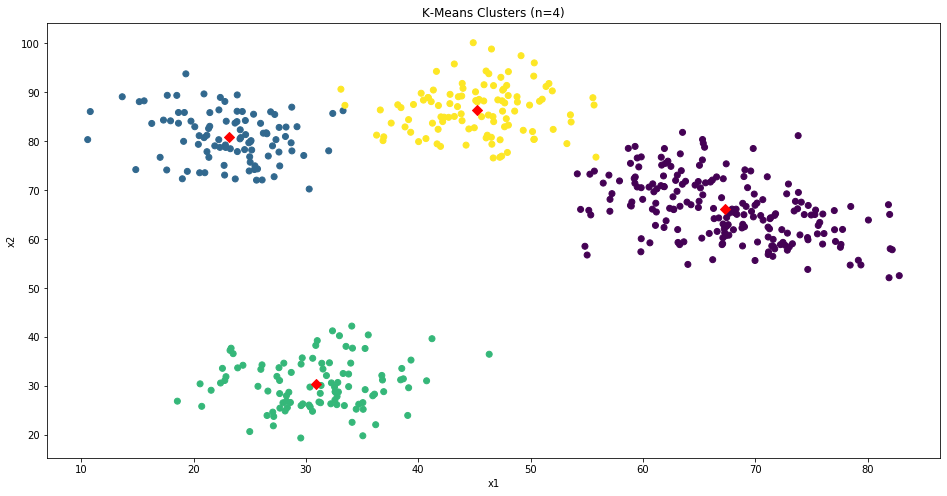

In [18]:
# 클러스터 모델을 시각화합니다.
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=pred)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='D', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clusters (n=%d)' % n_clusters)
plt.show()